# NLP

In [1]:
# Serves text and structured text data
# Compile docs, featurize them, compare features

In [2]:
# COSINE similarity on the vectors made to determine similarity
# Blue House: Blue, Red, House (1,0,1)
# Red house: Blue, Red, House (0,1,1)

In [3]:
# TERM FREQUENCY: Importance within that document
# TF(d,t) = Number of occurences of term in t in document d

# INVERSE DOCUMENTE FREQUENCY
# IDF(t) = log(D/t) where D = total number of documents, t=number of documents with the term

In [4]:
import nltk

In [6]:
#nltk.download_shell()

In [8]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [9]:
print(len(messages))

5574


In [13]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [15]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341.

In [16]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
import pandas as pd

In [18]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [19]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [22]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# Feature Engineering: the better the domain knowledge, the better

In [23]:
messages['length'] = messages['message'].apply(len)

In [24]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

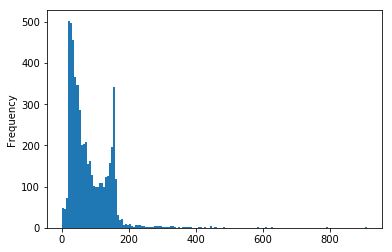

In [29]:
messages['length'].plot.hist(bins=150)

In [30]:
messages['length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [32]:
messages[messages['length'] > 900]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000294159C90B8>,
      dtype=object)

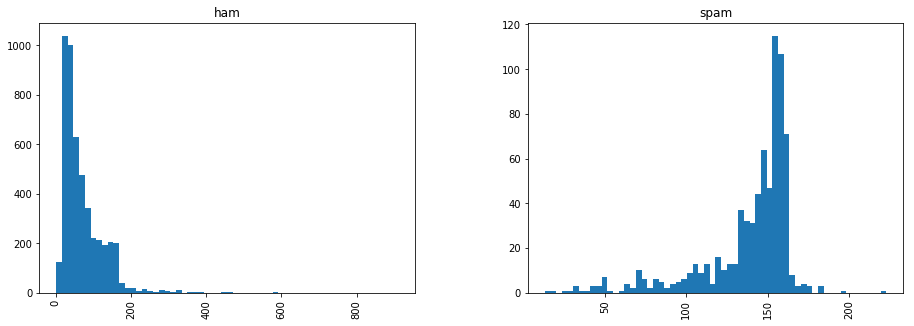

In [37]:
messages.hist(column='length', by='label', bins=60, figsize=(15,5))

# Text pre-processing

In [38]:
# Convert raw messages into vectors

In [39]:
import string

##### Remove punctuation

In [40]:
messa = 'samples messager! Notice: it has puntuation @ all lines.'

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
nopunc = [c for c in messa if c not in string.punctuation]

In [51]:
nopunc = ''.join(nopunc)

In [52]:
nopunc

'samples messager Notice it has puntuation  all lines'

##### Remove stop words

In [45]:
from nltk.corpus import stopwords

In [48]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
nopunc.split()

['samples', 'messager', 'Notice', 'it', 'has', 'puntuation', 'all', 'lines']

In [54]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [55]:
clean_mess

['samples', 'messager', 'Notice', 'puntuation', 'lines']

In [62]:
def text_process(mess):
    
    mess = [c for c in mess if c not in string.punctuation]
    mess = ''.join(mess)
    
    return [word for word in mess.split() if word.lower() not in stopwords.words('english')]

In [63]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Tokenize

In [64]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorisation

In [66]:
# Bag of Words: How many times word occurs? (term frequency)
# Weight the counts, so that frequent tokens get lower weights (inverse document frequency)
# Normalize vectors to unit length, to abstract from the original text length

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [69]:
print(len(bow_transformer.vocabulary_))

11425


In [70]:
mess4 = messages['message'][3]

In [71]:
print(mess4)

U dun say so early hor... U c already then say...


In [72]:
bow4 = bow_transformer.transform([mess4])

In [73]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [74]:
print(bow4.shape)

(1, 11425)


In [76]:
bow_transformer.get_feature_names()[9554]

'say'

# BOW Transformation

In [77]:
messages_bow = bow_transformer.transform(messages['message'])

In [78]:
print('Shape of the sparse matrix ', messages_bow.shape)

Shape of the sparse matrix  (5572, 11425)


In [79]:
messages_bow.nnz

50548

In [80]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

In [87]:
print(f"Sparsity (number of zeros over total messages): {sparsity}")

Sparsity (number of zeros over total messages): 0.07940295412668218


# TF : IDF Transform

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer

In [89]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [90]:
tfidf4 = tfidf_transformer.transform(bow4)

In [91]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


# ↑ ↑ ↑↑↑  Weight value for each word! ↑ ↑ ↑ ↑ ↑

In [92]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [93]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Train Spam Classifier: Naive Bayes Classifier

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [97]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [98]:
messages['label'][3]

'ham'

In [99]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [100]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# SPLIT DATA / Data Pipeline Capabilities

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
msg_train, msg_test,label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [105]:
from sklearn.pipeline import Pipeline

In [107]:
pipeline = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)), #Srings to integer
        ('tfid', TfidfTransformer()), # Take integers and weight TFIDF scores
        ('classifier', MultinomialNB())
])

In [108]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002941606ED90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [109]:
predictions = pipeline.predict(msg_test)


	             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1424
       spam       1.00      0.67      0.80       248

avg / total       0.95      0.95      0.95      1672



Text(0.5,15,'Predicted label')

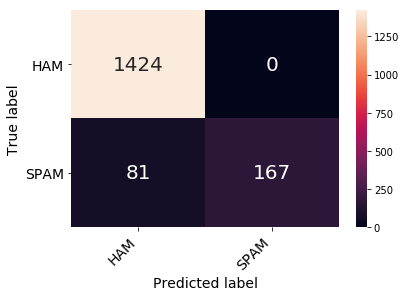

In [113]:
from sklearn.metrics import classification_report, confusion_matrix
print(f"\n\t{classification_report(label_test, predictions)}")
cfm = confusion_matrix(label_test, predictions)
confusion_matrix_df = pd.DataFrame(cfm, ('HAM', 'SPAM'), ('HAM', 'SPAM'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)